## Role of probability in inference
* We draw samples from a population, and use the samples statistics to represent the whole popoulation. When we saw a difference, is that due to sample drawing, or is it real?
* Hypothesis testing
    * Specify the null (H0) and alternative (Ha) hypothesis
    * Choose a sample
    * Access the evidence
    * Draw conclusions
    
* p value (typical alpha=0.05). p < 5%, the propability for H0 due to sample drawing is less than 5%; therefore we should reject H0, and accept Ha.
* p-value is the type one error rate. We could be wrong by rejecting H0 with probability p

## Bivariate statistical tools

1. For categorical explanatory variable and quantitative response variable, we should use an Analysis of Variance, ANOVA as our inferential test.
2. For both categorical variables, we should use Chi Square Test of independence as the inferential test.
3. For both quantitative variables, we should use correlation coefficient as the inferential test
4. For quantitative explanatory variable and categorical response variable, we should categorize the explanatory variable with two levels, and then use the Chi-Square Test of independence as the inferential test.

### ANOVA Examples
* Two group box: A measured length (1.1, 1.2, 1.14, 1.25...), B measured length  (1.12, 1.21, 1.3, 1.1...)
    * Explanatory variable is the box name (A or B), response is the lenght (Ya, Yb)
    * Is there a difference between A and B?
*  Measure major (Business, English, Math, Physics, etc) and attitude ((1, 2, 1, 2...) for Business, (2, 1, 2,3...) for English, etc)
    * Is there a relationship between major (explantory) and the attitude (response)
* NESARC data contains smoker and depression data
    * examples in the following cells

### ANOVA F test
* Are the difference among the sample means
    * real, difference among popoulation means
    * due to sample variability
* F = $\frac{variation among sample means}{variation within the groups}$
    * Larger F means better separation
    
* one way ANOVA F=46, p=0.0001, what does it mean?
    * large F means large varaition among samples to sample; data provide strong evidence to reject H0
    * p < 0.05 is saying the same things
    * We should reject H0, accept Ha
    
### ANOVA Post Hoc test
* If contains multiple group, u1=u2=u3=u4 is H0, all others could be H1, u1!=u2=u3=u4, u1=u2!=u3=u4, etc
* ANOVA didn't tell use which group is different from the others. Need do POST HOC Test
* Multiple ANOVA will not work, because type I error will accumulatie
    * $\alpha_{cum} = 1 - (1 - \alpha)^n$

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [2]:
data = pd.read_csv('data/nesarc.csv', low_memory=False)

In [3]:
# Examine the dataset
display(data.shape)
display(data.head())

(43093, 3008)

,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,...,SOL12ABDEP,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP
0,5,,1,4007,403,3928.613505,14,8,2001,4,...,0,0,0,0,0,0,0,0,0,0
1,5,0.0014,2,6045,604,3638.691845,12,1,2002,4,...,0,0,0,0,0,0,0,0,0,0
2,5,,3,12042,1218,5779.032025,23,11,2001,3,...,0,0,0,0,0,0,0,0,0,0
3,5,,4,17099,1704,1071.754303,9,9,2001,2,...,0,0,0,0,0,0,0,0,0,0
4,2,,5,17099,1704,4986.952377,18,10,2001,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Find data of interest
data['S3AQ3B1'] = pd.to_numeric(data['S3AQ3B1'], errors='coerce')
data['S3AQ3C1'] = pd.to_numeric(data['S3AQ3C1'], errors='coerce')
data['CHECK321'] = pd.to_numeric(data['CHECK321'], errors='coerce')
data['S9Q1A'] = pd.to_numeric(data['S9Q1A'], errors='coerce')

#subset data to young adults age 18 to 25 who have smoked in the past 12 months
sub1=data[(data['AGE']>=18) & (data['AGE']<=25) & (data['CHECK321']==1)].copy()

# use all data
#sub1=data.copy()
#SETTING MISSING DATA
sub1['S3AQ3B1']=sub1['S3AQ3B1'].replace(9, np.nan)
sub1['S3AQ3C1']=sub1['S3AQ3C1'].replace(99, np.nan)
sub1['S9Q1A']=sub1['S9Q1A'].replace(9, np.nan)

#recoding number of days smoked in the past month
recode1 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub1['USFREQMO']= sub1['S3AQ3B1'].map(recode1)


In [8]:
# Creating a secondary variable multiplying the days smoked/month and the number of cig/per day
sub1['NUMCIGMO_EST']=sub1['USFREQMO'] * sub1['S3AQ3C1']

sub1['NUMCIGMO_EST']= sub1['NUMCIGMO_EST']

ct1 = sub1.groupby('NUMCIGMO_EST').size()
print (ct1)

NUMCIGMO_EST
1.0       29
2.0       14
2.5       11
3.0       12
4.0        2
          ..
1050.0     1
1200.0    29
1800.0     2
2400.0     1
2940.0     1
Length: 66, dtype: int64


In [9]:
sub2 = sub1[['S3AQ3C1', 'TABP12MDX']].dropna()
model1 = smf.ols(formula='S3AQ3C1 ~ C(TABP12MDX)', data=sub2)
results1 = model1.fit()
print (results1.summary())

print ('means for numcigmo_est by past year Nicoten dependence')
m1= sub2.groupby('TABP12MDX').mean()
print (m1)

                            OLS Regression Results                            
Dep. Variable:                S3AQ3C1   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sat, 07 May 2022   Prob (F-statistic):           8.74e-26
Time:                        14:58:30   Log-Likelihood:                -6027.1
No. Observations:                1697   AIC:                         1.206e+04
Df Residuals:                    1695   BIC:                         1.207e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.2814      0.28

In [10]:
sub2 = sub1[['NUMCIGMO_EST', 'MAJORDEPLIFE']].dropna()
model1 = smf.ols(formula='NUMCIGMO_EST ~ C(MAJORDEPLIFE)', data=sub2)
results1 = model1.fit()
print (results1.summary())

print ('means for numcigmo_est by major depression status')
m1= sub2.groupby('MAJORDEPLIFE').mean()
print (m1)
print ('standard deviations for numcigmo_est by major depression status')
sd1 = sub2.groupby('MAJORDEPLIFE').std()
print (sd1)

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.550
Date:                Sat, 07 May 2022   Prob (F-statistic):             0.0597
Time:                        14:58:30   Log-Likelihood:                -11934.
No. Observations:                1697   AIC:                         2.387e+04
Df Residuals:                    1695   BIC:                         2.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              312.8380 

In [11]:
sub2 = sub1[['NUMCIGMO_EST', 'MAJORDEP12']].dropna()
model1 = smf.ols(formula='NUMCIGMO_EST ~ C(MAJORDEP12)', data=sub2)
results1 = model1.fit()
print (results1.summary())

print ('means for numcigmo_est by past 12 month major depression status')
m1= sub2.groupby('MAJORDEP12').mean()
print (m1)
print ('standard deviations for numcigmo_est by past 12 month major depression status')
sd1 = sub2.groupby('MAJORDEP12').std()
print (sd1)

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.804
Date:                Sat, 07 May 2022   Prob (F-statistic):             0.0285
Time:                        14:58:45   Log-Likelihood:                -11933.
No. Observations:                1697   AIC:                         2.387e+04
Df Residuals:                    1695   BIC:                         2.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            313.5319      7

Here we asked a different question: does the number of cigarettes smokes per month correlate with the CURRENT depression status? i.e, the depression of the major depression in last 12 months. The OLS regression results shows that the F-statistic is 4.804 and the p value is 0.0285. Here p value less than 0.05 indicates that the young adult smokers with CURRENT major depression smoke significantly more cigarettes per month than young adult smokers without CURRENT major depression.

In [9]:
sub3 = sub1[['NUMCIGMO_EST', 'ETHRACE2A']].dropna()

model2 = smf.ols(formula='NUMCIGMO_EST ~ C(ETHRACE2A)', data=sub3).fit()
print (model2.summary())

print ('means for numcigmo_est by major depression status')
m2= sub3.groupby('ETHRACE2A').mean()
print (m2)

print ('standard deviations for numcigmo_est by major depression status')
sd2 = sub3.groupby('ETHRACE2A').std()
print (sd2)

mc1 = multi.MultiComparison(sub3['NUMCIGMO_EST'], sub3['ETHRACE2A'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     24.40
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.18e-19
Time:                        14:42:12   Log-Likelihood:                -11888.
No. Observations:                1697   AIC:                         2.379e+04
Df Residuals:                    1692   BIC:                         2.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           368.7865      8.22

In [10]:
sub2 = sub1[['NUMCIGMO_EST', 'S9Q1A']].dropna()
model1 = smf.ols(formula='NUMCIGMO_EST ~ C(S9Q1A)', data=sub2)
results1 = model1.fit()
print (results1.summary())

print ('means for numcigmo_est by past year Nicoten dependence')
m1= sub2.groupby('S9Q1A').mean()
print (m1)

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.661
Date:                Sat, 07 May 2022   Prob (F-statistic):              0.103
Time:                        14:42:29   Log-Likelihood:                -11616.
No. Observations:                1651   AIC:                         2.324e+04
Df Residuals:                    1649   BIC:                         2.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         363.3606     26.976     

In [11]:
sub3 = sub1[['NUMCIGMO_EST', 'ALCABDEP12DX']].dropna()

model2 = smf.ols(formula='NUMCIGMO_EST ~ C(ALCABDEP12DX)', data=sub3).fit()
print (model2.summary())

print ('means for numcigmo_est by Alcohol abuse/dependence status')
m2= sub3.groupby('ALCABDEP12DX').mean()
print (m2)

print ('standard deviations for numcigmo_est by Alcohol abuse/dependence status')
sd2 = sub3.groupby('ALCABDEP12DX').std()
print (sd2)

print("POST HOC ****")
mc1 = multi.MultiComparison(sub3['NUMCIGMO_EST'], sub3['ALCABDEP12DX'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:           NUMCIGMO_EST   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.862
Date:                Sat, 07 May 2022   Prob (F-statistic):           0.000558
Time:                        14:42:38   Log-Likelihood:                -11927.
No. Observations:                1697   AIC:                         2.386e+04
Df Residuals:                    1693   BIC:                         2.388e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              312.5993 

We ask the question that whether or not Alcohol abuse/dependence has association with number of cigarettes smoked by the young adult. There are four groups of alcohol abuse/dependence in last 12 months: No alcohol diagnosis, Alcohol abuse only, Alcohol dependence only, Alcohol abuse and dependence. Here the null hypothesis H0 is that there is no association between the number of cigarettes smoked by young adults and the four alcohol usage categories. The alternative hypothesis is that there is a difference between the number of cigarettes smoked by young adults and the four categories. As shown in the following OLS regression, the average number of cigarettes smoked for each category are 312.6 (category 0), 309.8 (category 1), 271.6 (category 2), and 383 (category 3), with standard deviation of are 256.8 (category 0), 317.4 (category 1), 263.2 (category 2), and 314.2 (category 3). The F-statistic is 5.862, and p value is 0.000558 which is less than 0.05. We can safely reject the null hypothesis and accept the alternative hypothesis. We conclude that the number of cigarettes smoked by young adults is associated with the number of Alcohol abuse/dependence status.

The results of post hoc analysis (Tukey HSD) are shown above. Here we can determine which category smoke significantly different mean number of cigarettes than the others, in which the reject column is true. We can conclude that category 3 (Alcohol abuse and dependence) smoke significantly more cigarettes per month than individual from category 0 (no alcohol diagnosis), 1 (alcohol abuse only), and 2 (alcohol dependence only). On the other side, individuals from category 0, 1, and 2 do not smoke significantly different number of cigarettes. 

<AxesSubplot:ylabel='Frequency'>

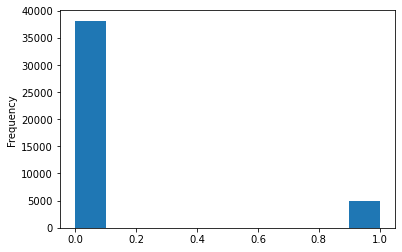

In [12]:
t = pd.to_numeric(data['TAB12MDX'], errors='coerce')
t=t.replace(99, np.nan)
t.plot(kind="hist")